# Chemotherapy Proportions

Run this notebook to reproduce our plot for the proportion of patients receiving chemotherapy by age group.

Authors: Mattes Warning, Friederike Moroff
    

In [1]:
import numpy as np
import pandas as pd

from tueplots import bundles
from matplotlib import pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# Read data
data = pd.read_csv("../../dat/preprocessed_brca_metabric_clinical_data.tsv", sep='\t')

# Age groups for 5 year but below 35 and above 85 will be in one group
bins = [0, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, float('inf')]  # Define the age bins
labels = [1,2,3,4,5,6,7,8,9,10,11,12]
labels_2 = ['$<$35', '35-40', '40-45', '45-50', '50-55', '55-60', '60-65', '65-70', '70-75', '75-80', '80-85', '$\ge$85']
data['Age Groups'] = pd.cut(data['Age at Diagnosis'], bins=bins, labels=labels, right=False)

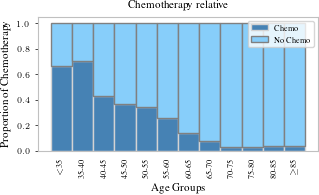

In [3]:
plt.rcParams.update(bundles.icml2022(column="half", nrows=1, ncols=1))

### Age vs Chemotherapy 
# distribution of age after making the groups
chemo = data[data['Chemotherapy'] == 1]

# Age with chemotherapy relative
table = pd.crosstab(data['Age Groups'], data['Chemotherapy'])
table_percentage = table.div(table.sum(axis=1), axis=0)

no_chemo_counts = table_percentage.iloc[:, 0].to_numpy()
chemo_counts = table_percentage.iloc[:, 1].to_numpy()

counts = {"Chemo": chemo_counts, "No Chemo": no_chemo_counts,}

colors = {'Chemo': 'steelblue', 'No Chemo': 'lightskyblue'}
edgecol = {'Chemo': 'lightgrey', 'No Chemo': 'grey'}


fig, ax = plt.subplots()
bottom = np.zeros(12)

for label, count in counts.items():
    ax.bar(table_percentage.index, count,width=1, bottom=bottom,label=label, color=colors[label], edgecolor=edgecol[label])
    bottom += count
    
    
plt.setp(ax.spines.values(), lw=0.8, color='silver')
ax.set_xticks(np.arange(1, 13), labels_2, rotation=90)
ax.xaxis.set_ticks_position('none')
ax.tick_params(width=0.5, length=2)
ax.set_xlabel('Age Groups')
ax.set_ylabel('Proportion of Chemotherapy')

plt.title('Chemotherapy relative')
plt.legend()
plt.savefig('fig_ChemoProportions.pdf')
plt.show()